# RISK MANAGEMENT CODE – RYANAIR, CUSTOMER SATTISFACTION

#### This is the code befind the risk mangagement report. 
In the code, I have commented information that I think is usfull to explain the steps in the code. 

### Import all the libraries the analysis need

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

## Download and get to know the dataset

In [2]:
#After downloading the datasets from kaggle, and plasing them in the same folder as this code.
#The datasets are imported and saved as a pandas dataframe
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train
#This output visulize the first 5 rows and the last 5

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
train.nunique()
#This function finds the unique values and helps understandin the dataset even more

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [5]:
train.sample(5)
#Here is 5 random sampled rows

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
46231,46231,61828,Female,Loyal Customer,17,Personal Travel,Eco,1379,1,1,...,1,3,2,3,4,3,1,11,0.0,neutral or dissatisfied
31315,31315,53458,Male,Loyal Customer,44,Business travel,Business,2288,2,2,...,5,5,4,5,2,5,4,0,0.0,satisfied
77922,77922,83352,Male,Loyal Customer,54,Personal Travel,Business,1124,3,5,...,1,1,3,1,5,1,3,0,0.0,neutral or dissatisfied
27217,27217,37395,Male,Loyal Customer,59,Business travel,Eco,972,3,4,...,3,5,5,5,5,2,3,10,0.0,satisfied
23898,23898,73184,Male,Loyal Customer,39,Business travel,Business,1258,2,1,...,2,2,1,2,3,2,3,125,128.0,neutral or dissatisfied


## Explanatory Data Analysis

In [6]:
#Starting with some basic information lik info and discriptive statsitics 
print("Basic Info:")
train.info()

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location              

In [7]:
print("\nSummary Statistics:")
train.describe(include='all')


Summary Statistics:


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904,103904,103904.000000,103904,103904,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904
unique,NaN,NaN,2,2,NaN,2,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,NaN,52727,84923,NaN,71655,49665,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,51951.500000,64924.210502,NaN,NaN,39.379706,NaN,NaN,1189.448375,2.729683,3.060296,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,NaN
std,29994.645522,37463.812252,NaN,NaN,15.114964,NaN,NaN,997.147281,1.327829,1.525075,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,NaN
min,0.000000,1.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,25975.750000,32533.750000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,51951.500000,64856.500000,NaN,NaN,40.000000,NaN,NaN,843.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,77927.250000,97368.250000,NaN,NaN,51.000000,NaN,NaN,1743.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


In [8]:
#Next: It is important to check for missing values 
print("\nMissing Values:")
train.isnull().sum()


Missing Values:


Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

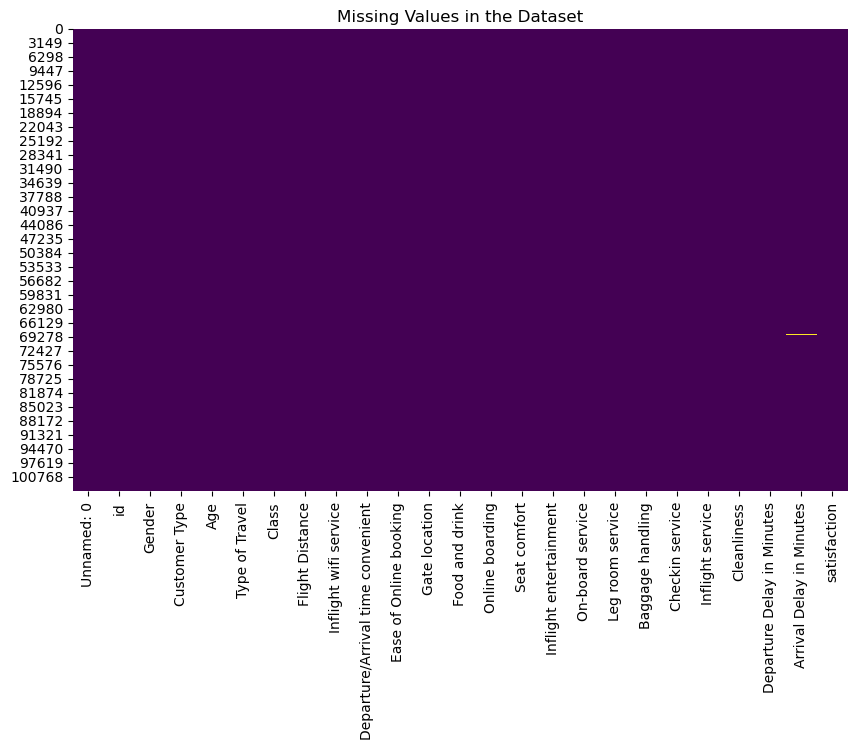

In [9]:
#the result show that there are some missing values, for better understanding about where they are, a visualization is made
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in the Dataset")
plt.show()

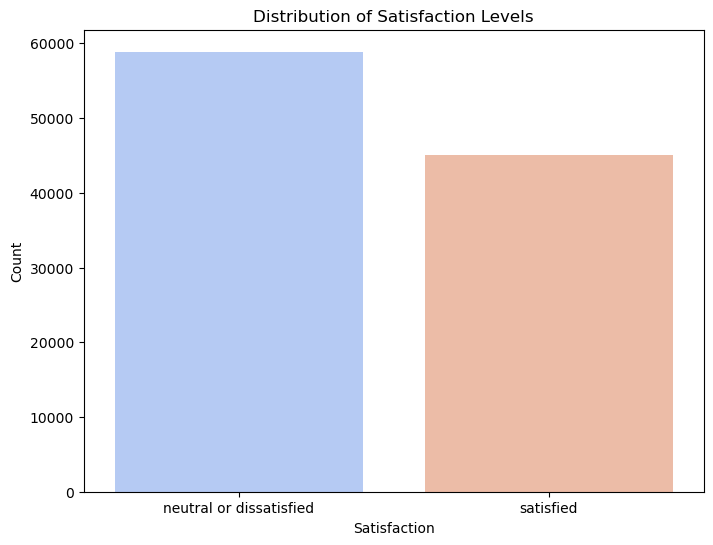

In [10]:
#The target varaible in the analysis is the "Distribution of Satisfaction Levels"
#Here is an visualisation of the distribution og the variable
plt.figure(figsize=(8, 6))
sns.countplot(train, x='satisfaction', palette='coolwarm')
plt.title("Distribution of Satisfaction Levels")
plt.xlabel("Satisfaction")
plt.ylabel("Count")
plt.show()

<Figure size 1500x1000 with 0 Axes>

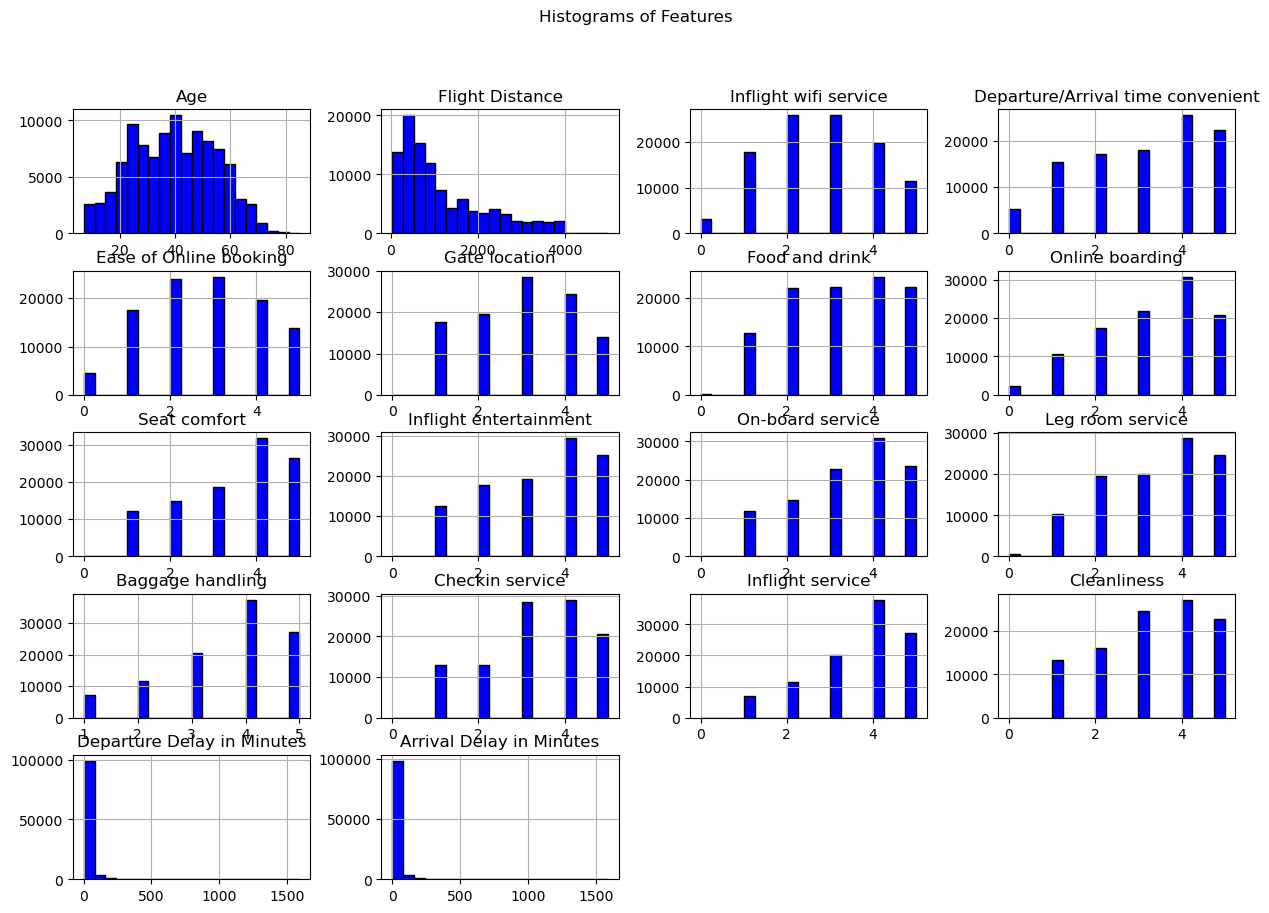

In [11]:
#We can make a hitogram of all the features, the ordinal,binary, and numerical 
plt.figure(figsize=(15, 10))
train[train.columns[2:]].hist(bins=20, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle("Histograms of Features")
plt.show()


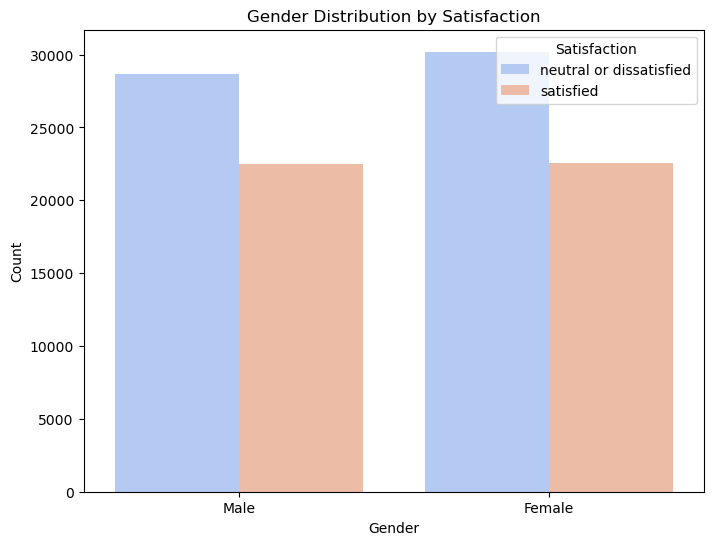

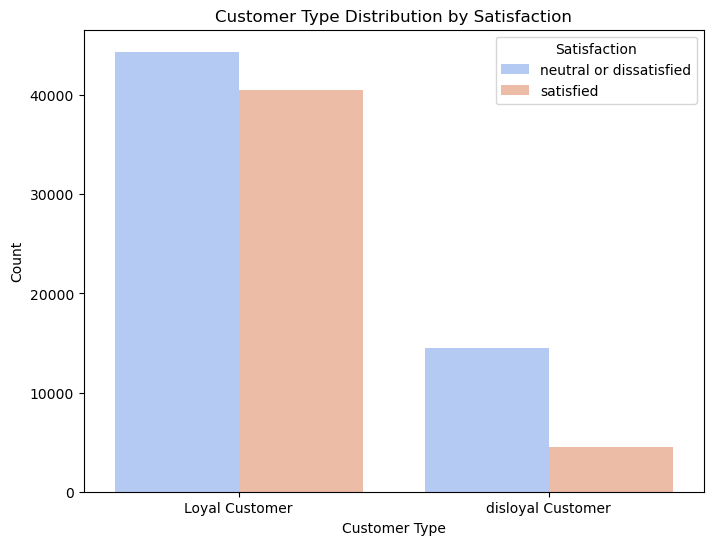

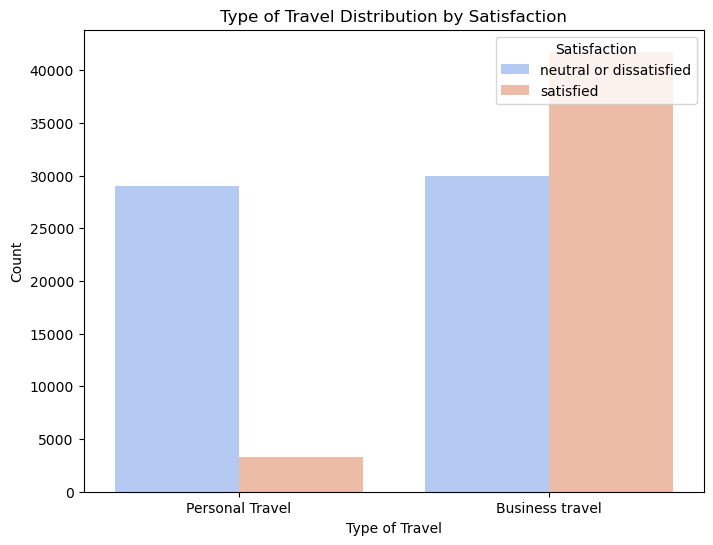

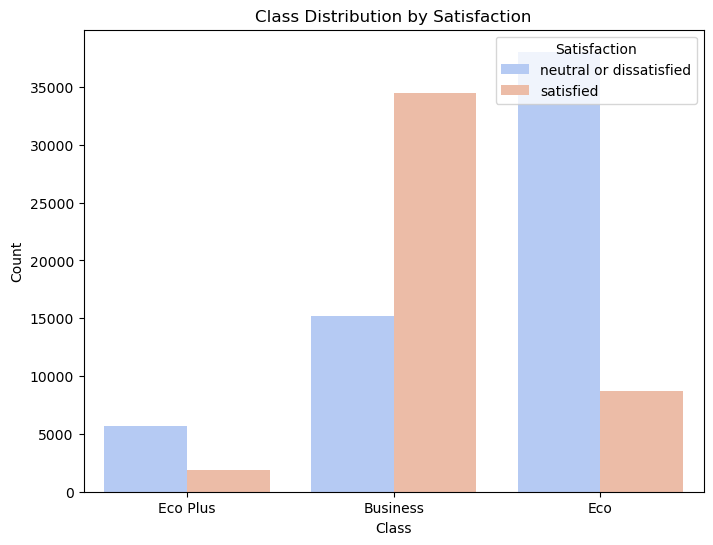

In [12]:
#visualisation of the categorical features up agianst satisfaction
cat = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

for col in cat:
    plt.figure(figsize=(8, 6))
    sns.countplot(train, x=col, hue='satisfaction', palette='coolwarm')
    plt.title(f"{col} Distribution by Satisfaction")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Satisfaction", loc='upper right')
    plt.show()

## Preprossesing 

In [13]:
#To doe the preprosessing for the Random Forest Classifier based on the EDA, a function were made 
numerical = ['Age', 'Flight Distance']

def preprocess_data(data):
    #Replaceing the  missing values 'Arrival Delay in Minutes' with 0
    data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(0)

    #Encodeing the categorical features and target varible to use them in the model 
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_feat = encoder.fit_transform(data[cat])
    encoded_data = pd.DataFrame(encoded_feat, columns=encoder.get_feature_names_out(cat))

    #Now we have new columns that we whould lieke to replace woth the old ones, so we drop them
    data = data.drop(columns=cat)
    data = pd.concat([data.reset_index(drop=True), encoded_data.reset_index(drop=True)], axis=1)

    # Encode target variable
    #if 'satisfaction' in data.columns:
    #    label_encoder = LabelEncoder()
    #    data['satisfaction'] = label_encoder.fit_transform(data['satisfaction'])

    #To use the "Depature Delay in Minutes", new freatues are created to be able to use them in the Random Forest classifier
    data['short_delay'] = (data['Departure Delay in Minutes'] <= 15).astype(int)
    data['moderate_delay'] = ((data['Departure Delay in Minutes'] > 15) & 
                              (data['Departure Delay in Minutes'] <= 60)).astype(int)
    data['long_delay'] = (data['Departure Delay in Minutes'] > 60).astype(int)

    #Drop original delay columns
    data = data.drop(columns=['Departure Delay in Minutes', 'Arrival Delay in Minutes'], errors='ignore')


    # Standardize numerical features
    scaler = StandardScaler()
    scaled_feat = scaler.fit_transform(data[numerical])
    scaled_data = pd.DataFrame(scaled_feat, columns=numerical)

    #Drop original numerical features and append scaled ones that we made
    data = data.drop(columns=numerical)
    data = pd.concat([data.reset_index(drop=True), scaled_data.reset_index(drop=True)], axis=1)

    return data


In [14]:
#Now the funcgtion is used on the two datasets 
train = preprocess_data(train)
test = preprocess_data(test)


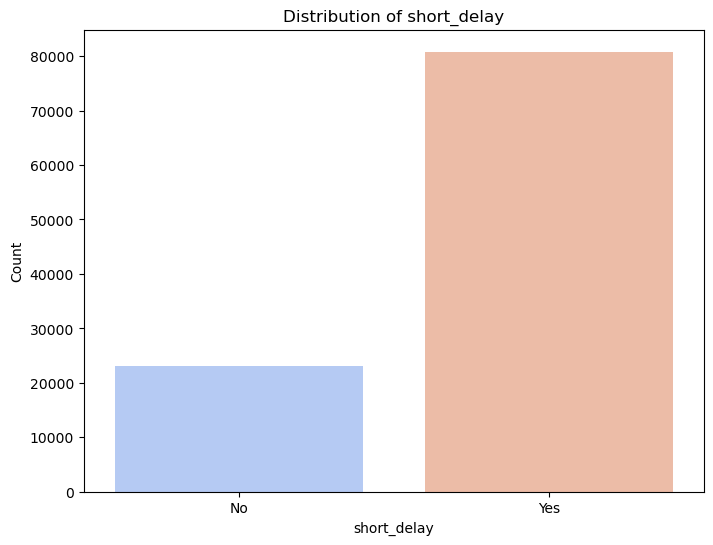

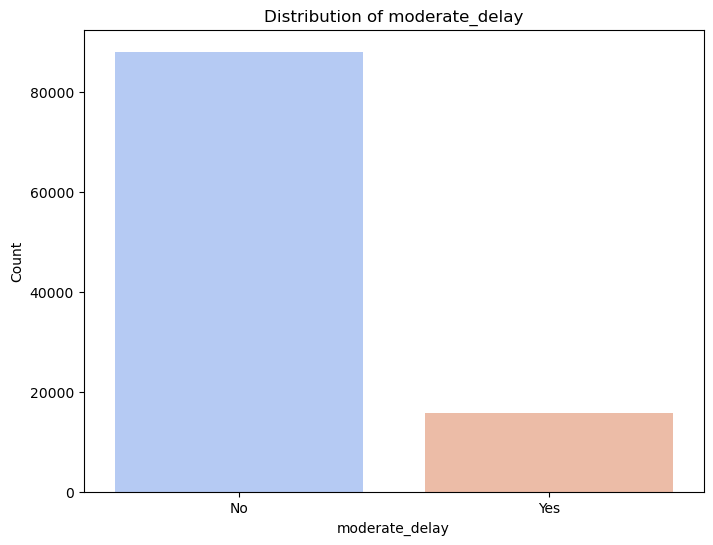

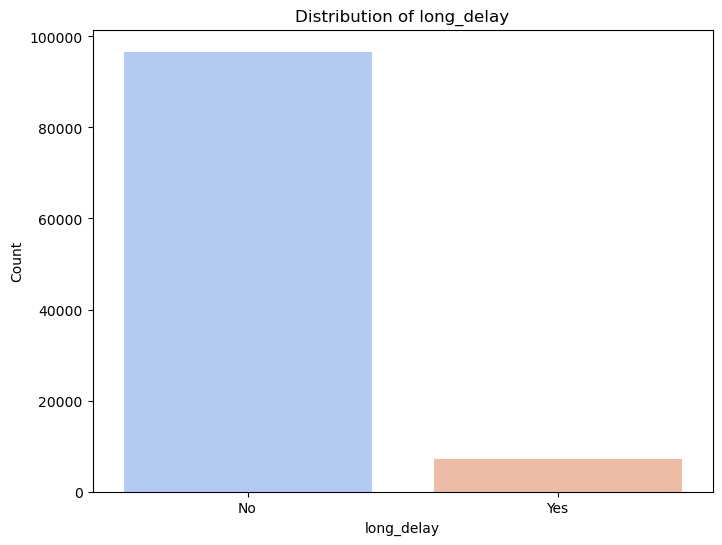

In [15]:
#Because we made new featrues based on the delay feature, we can now visulize it to get a better view on how it looks
delay = ['short_delay', 'moderate_delay', 'long_delay']

for feature in delay:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=train[feature], palette='coolwarm')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.show()

C:\Users\matil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


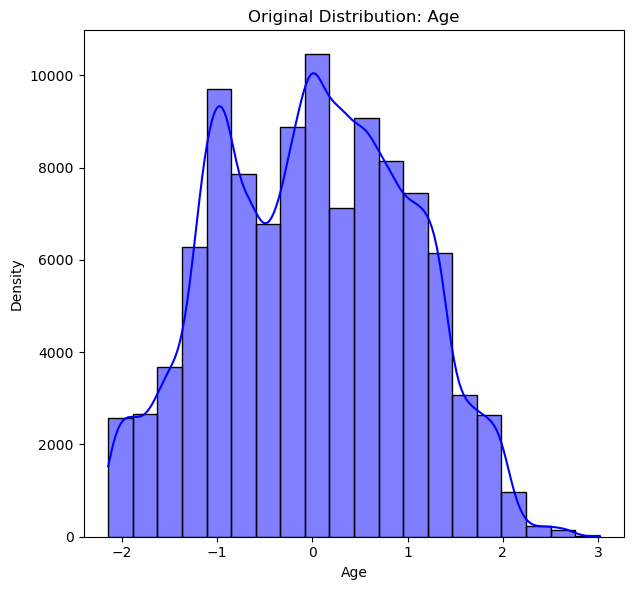

C:\Users\matil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


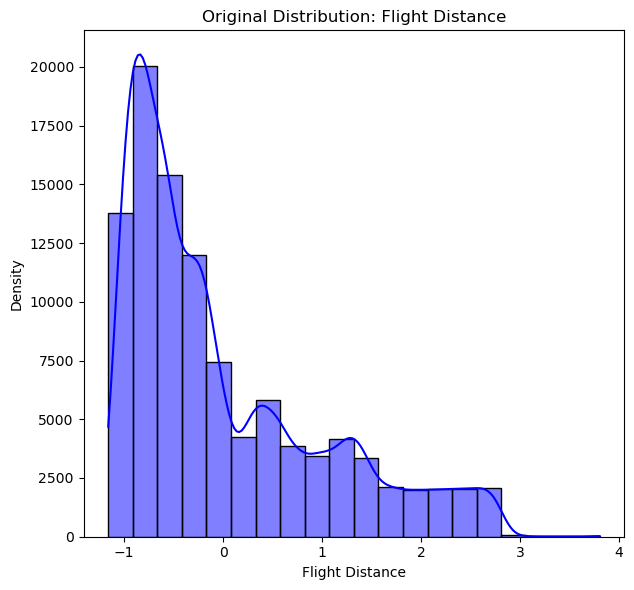

In [16]:
#Let us compare feature distributions before and after Scailing
for feature in numerical:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(train[feature], kde=True, color="blue", bins=20)
    plt.title(f"Original Distribution: {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()


In [17]:
#Separate features and target variable

train_x = train.drop(columns=['satisfaction', 'id', 'Unnamed: 0'])
train_y = train['satisfaction']

test_x = test.drop(columns=['satisfaction', 'id', 'Unnamed: 0'])
test_y = test['satisfaction']


## Imbalanced dataset

In [18]:
#Because the dataset is imbalanced, SMOTE is applied
smote = SMOTE(random_state=50)
train_x_balanced, train_y_balanced = smote.fit_resample(train_x, train_y)

# Scale numerical features
scaler = StandardScaler()
train_x_balanced = scaler.fit_transform(train_x_balanced)
test_x = scaler.transform(test_x)


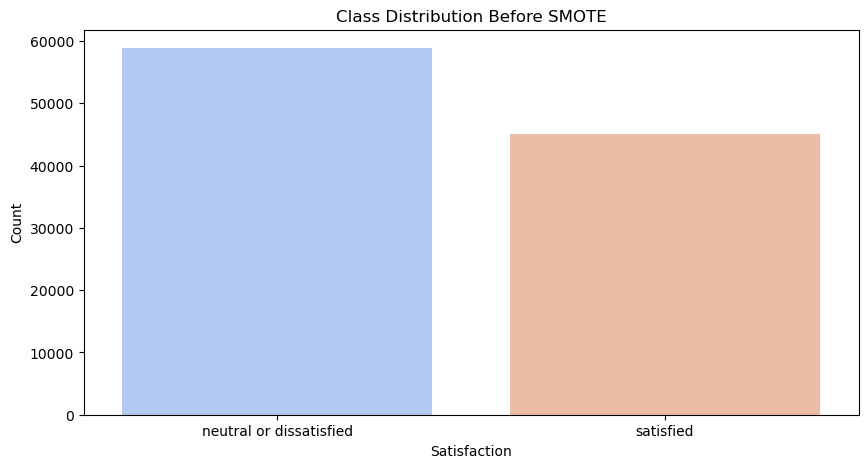

([<matplotlib.axis.XTick at 0x1b36ded9b50>,
 [Text(0, 0, 'neutral or dissatisfied'), Text(1, 0, 'satisfied')])

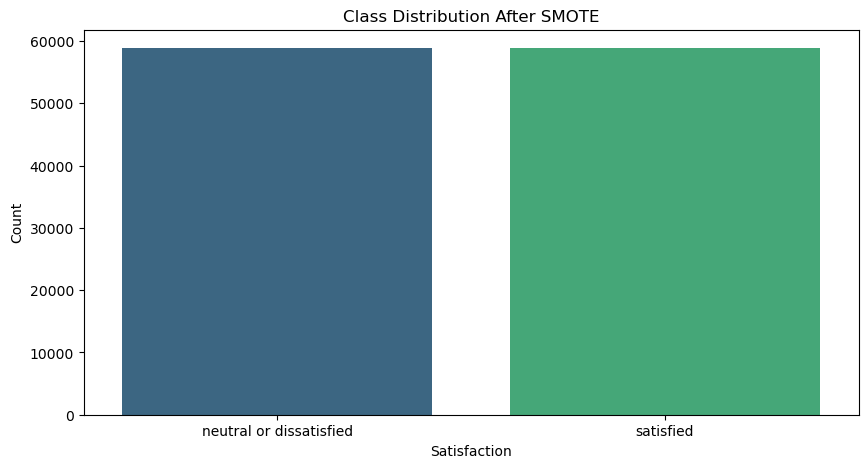

In [19]:
# Plot class distribution before SMOTE
plt.figure(figsize=(10, 5))
sns.countplot(x=train_y, palette='coolwarm')
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Satisfaction")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["neutral or dissatisfied", "satisfied"])
plt.show()

# Plot class distribution after SMOTE
plt.figure(figsize=(10, 5))
sns.countplot(x=train_y_balanced, palette='viridis')
plt.title("Class Distribution After SMOTE")
plt.xlabel("Satisfaction")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["neutral or dissatisfied", "satisfied"])


## Model development 

In [20]:
#Start with training the Random Forest Classifier on the training data
rf_model = RandomForestClassifier(random_state=50, n_estimators=100)
rf_model.fit(train_x_balanced, train_y_balanced)

RandomForestClassifier(random_state=50)

In [21]:
#The model is build, let us chesk it on the tesing data and evaluate the model
pred_y = rf_model.predict(test_x)
print("Classification Report:")
print(classification_report(test_y, pred_y))
print("Confusion Matrix:")
print(confusion_matrix(test_y, pred_y))

Classification Report:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.97      0.97     14573
              satisfied       0.97      0.95      0.96     11403

               accuracy                           0.96     25976
              macro avg       0.96      0.96      0.96     25976
           weighted avg       0.96      0.96      0.96     25976

Confusion Matrix:
[[14205   368]
 [  625 10778]]


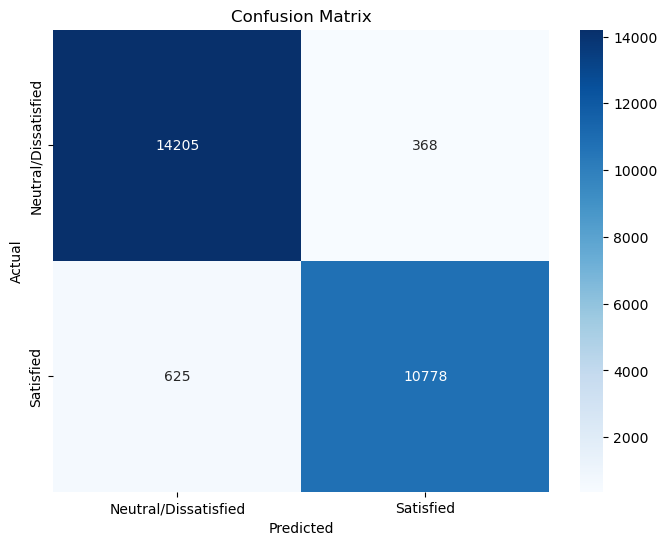

In [22]:
cm = confusion_matrix(test_y, pred_y, labels=['neutral or dissatisfied', 'satisfied'])

#Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Neutral/Dissatisfied', 'Satisfied'], yticklabels=['Neutral/Dissatisfied', 'Satisfied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
#Calculate AUC-ROC
proba_y = rf_model.predict_proba(test_x)[:, 1]
roc_auc = roc_auc_score(test_y, proba_y)
print(f"AUC-ROC: {roc_auc:.2f}")

AUC-ROC: 0.99


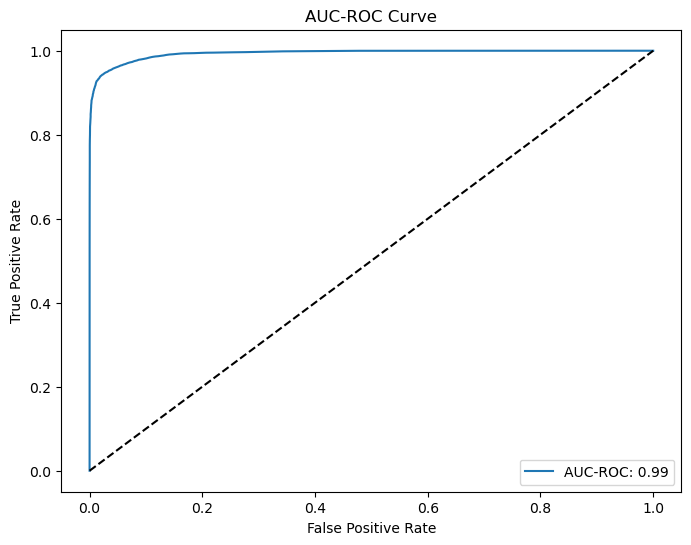

In [24]:
#Plot AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(test_y, proba_y, pos_label='satisfied')
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC-ROC: {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve")
plt.legend()
plt.show()

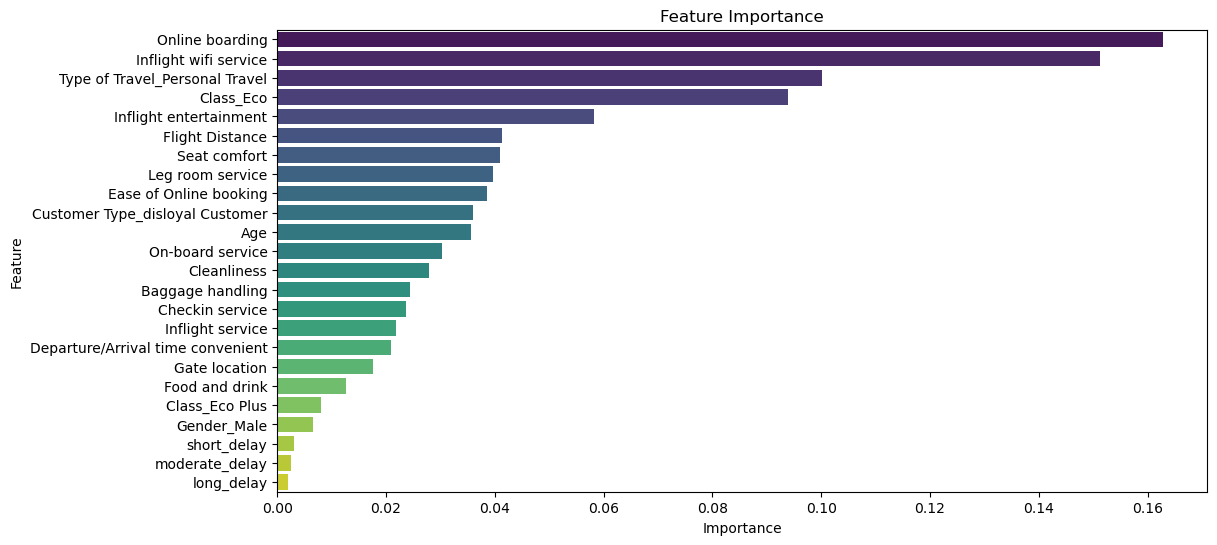

In [25]:
#To undersand the output better we cen print the feature importance
feature_importances = pd.DataFrame({'Feature': train_x.columns,'Importance': rf_model.feature_importances_}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance")
plt.show()

## Predictive Analysis for New Costumers

In [27]:
#To test the model for its potenital usecases 
#Ensure aligned_new_passengers matches the training data structure
passengers = pd.DataFrame(0, index=range(2), columns=train_x.columns)

#Define feature values for the two hypothetical passengers
#Passenger 1: 25-year-old male traveling 600 km with a 5-min departure delay, Economy, disloyal customer
passengers.loc[0, ['Age', 'Flight Distance', 'short_delay', 'moderate_delay', 'long-delay']] = [25, 600, 1, 0, 0]
passengers.loc[0, ['Gender_Male', 'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel', 'Class_Eco']] = [1, 1, 1, 1]

#Passenger 2: 45-year-old female traveling 2000 km with 60-min departure and 50-min arrival delays, Eco Plus, loyal customer
passengers.loc[1, ['Age', 'Flight Distance','short_delay', 'moderate_delay', 'long-delay']] = [45, 2000, 0, 1, 1]
passengers.loc[1, ['Gender_Male', 'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel', 'Class_Eco Plus']] = [0, 0, 1, 1]

#Add missing features as zeros
misssing = set(train_x.columns) - set(passengers.columns)
for feature in misssing:
    passengers[feature] = 0

passengers = passengers[train_x.columns]
features = list(scaler.feature_names_in_)  # Fetch the exact numerical features used for scaling
passengers[features] = scaler.transform(passengers[features])

#Predict satisfaction and probabilities for the new passengers
predicted_satisfaction = rf_model.predict(passengers)
predicted_probabilities = rf_model.predict_proba(passengers)

#Convert predictions to labels
results = pd.DataFrame({
    "Passenger": range(1, len(passengers) + 1),
    "Predicted Satisfaction": predicted_satisfaction,  # Directly use the string predictions
    "Probability (Neutral/Dissatisfied)": predicted_probabilities[:, 0],
    "Probability (Satisfied)": predicted_probabilities[:, 1]
})

# Display the results
print("Predictions for New Passengers:")
print(results)


Predictions for New Passengers:
   Passenger Predicted Satisfaction  Probability (Neutral/Dissatisfied)  \
0          1              satisfied                                0.27   
1          2              satisfied                                0.30   

   Probability (Satisfied)  
0                     0.73  
1                     0.70  


C:\Users\matil\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\matil\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


PDF is Saved Successfully


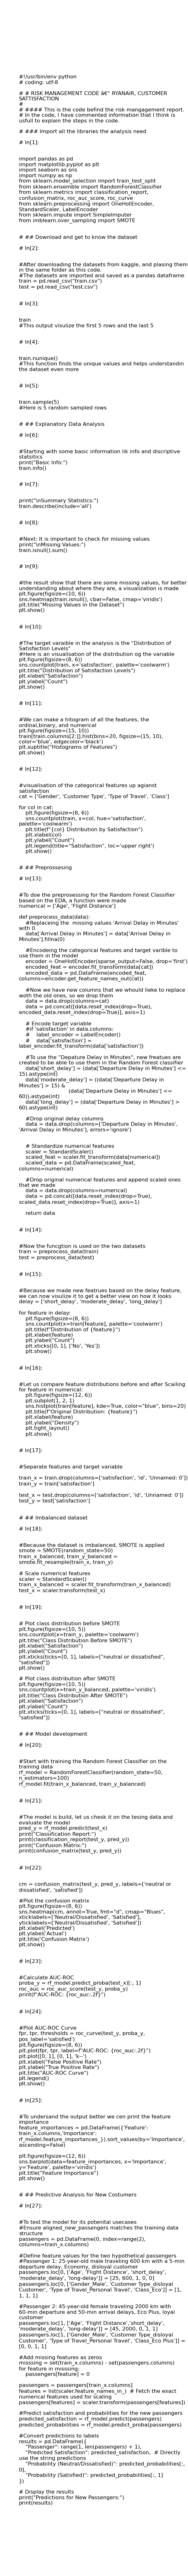

In [35]:
def convert_to_pdf_matplotlib(input_file, output_pdf):
    with open(input_file, 'r') as python_file:
        content = python_file.read()
        fig, ax = plt.subplots()
        ax.text(0.1, 0.5, content, wrap=True, fontsize=12)
        ax.axis('off')
        plt.savefig(output_pdf, format='pdf')

# Example usage:
convert_to_pdf_matplotlib('exam_code.py', 'code_exam.pdf')
print("PDF is Saved Successfully")
